<a href="https://colab.research.google.com/github/Trevor369-ad/robot_arm_kinematics_simulation_for_GRASP2025/blob/main/robot_arm_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ikpy

In [2]:
import ikpy.chain
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define link lengths
L1, L2, L3 = (98.50+4.23), 147.50, 116.25

# Define limits
base_limits_deg = (-96, 98)
shoulder_limits_deg = (-113, 115)
elbow_limits_deg = (-113, 115)
wrist_limits_deg = (-70, 70)

# Convert limits to radians
base_limits_rad = (np.deg2rad(base_limits_deg[0]), np.deg2rad(base_limits_deg[1]))
shoulder_limits_rad = (np.deg2rad(shoulder_limits_deg[0]), np.deg2rad(shoulder_limits_deg[1]))
elbow_limits_rad = (np.deg2rad(elbow_limits_deg[0]), np.deg2rad(elbow_limits_deg[1]))
wrist_limits_rad = (np.deg2rad(wrist_limits_deg[0]), np.deg2rad(wrist_limits_deg[1]))

# Define the chain
arm_chain = ikpy.chain.Chain(name='3_dof_arm', links=[
    ikpy.link.URDFLink(
      name='base_pan_joint',
      origin_translation=[0, 0, 0],
      origin_orientation=[0, 0, (22/7)+(22/14)],
      rotation=[0, 0, 1],
      bounds=base_limits_rad,
    ),

    ikpy.link.URDFLink(
      name='shoulder_pitch_joint',
      origin_translation=[0, 0, L1],
      origin_orientation=[-(22/7), -(22/14), 0],
      rotation=[0, -1, 0],
      bounds=shoulder_limits_rad,
    ),

    ikpy.link.URDFLink(
      name='elbow_pitch_joint',
      origin_translation=[L2, 0, 0],
      origin_orientation=[-(22/7), 0, 0],
      rotation=[0, 1, 0],
      bounds=elbow_limits_rad,
    ),

    ikpy.link.URDFLink(
      name='wrist_pitch_joint',
      origin_translation=[L3, 0, 0],
      origin_orientation=[0, 0, 0],
      rotation=[0, 1, 0],
      bounds=wrist_limits_rad,
    ),
])

# Define Target
x = 20.0
y = 100.0
z = 80.0
target_position = [x, y, z]

In [4]:
#Your inverse kinematics code


#joint_angles_degrees = [a 1x3 list/matrix of your IK output joint angles]
#Your inverse kinematics code

In [6]:
# Hardcoded angles for verification
joint_angles_degrees = [120, 60, 73]

# Prepare angle list (Initialize with 0s for all links)
joint_angles_radians = [0] * len(arm_chain.links)

# Map degrees to the specific joints
joint_angles_radians[0] = np.deg2rad(joint_angles_degrees[0])
joint_angles_radians[1] = np.deg2rad(joint_angles_degrees[1])
joint_angles_radians[2] = np.deg2rad(joint_angles_degrees[2])

print(f"Calculated Joint Angles (degrees):")
print(f"  Joint 1 (Base):         {joint_angles_degrees[0]}")
print(f"  Joint 2 (Shoulder):     {joint_angles_degrees[1]}")
print(f"  Joint 3 (Elbow):        {joint_angles_degrees[2]}")

def verify(joint_angles = joint_angles_radians):
  real_position_matrix = arm_chain.forward_kinematics(joint_angles)
  # The position is in the first 3 rows of the 4th column of the 4x4 matrix
  real_position = real_position_matrix[:3, 3]
  distance_error = np.linalg.norm(target_position - real_position)

  print(f"The arm's calculated end position is: {real_position}")
  print(f"Distance error from target: {distance_error:.4f} mm")

  if distance_error != 0:
    print("\nNOTE: The position does not match the target because hardcoded angles were used.")

verify(joint_angles = joint_angles_radians)

Calculated Joint Angles (degrees):
  Joint 1 (Base):         120
  Joint 2 (Shoulder):     60
  Joint 3 (Elbow):        73
The arm's calculated end position is: [184.26038517 106.37579503  97.33228395]
Distance error from target: 165.2953 mm

NOTE: The position does not match the target because hardcoded angles were used.


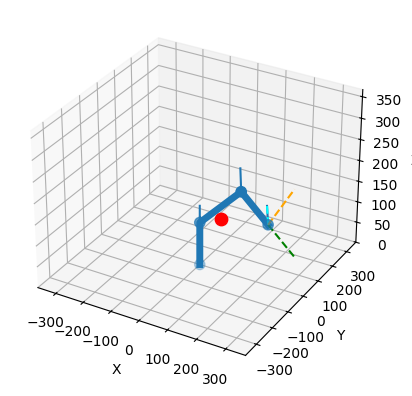

In [7]:
# Visualize the arm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arm_chain.plot(joint_angles_radians, ax, target=target_position)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
workspace_limit = sum([L1, L2, L3])
ax.set_xlim(-workspace_limit, workspace_limit)
ax.set_ylim(-workspace_limit, workspace_limit)
ax.set_zlim(0, workspace_limit)
plt.show()